In [3]:
import re
import pandas as pd

file_path = "data_group1.txt"  # Ubah dengan nama file Anda
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()
# Contoh data dari file teks
# Pola regex
# Contoh pesan
# Pola regex
pattern = r"(\d{1,2}/\d{1,2}/\d{4}), (\d{1,2}:\d{2}\s?[APap][Mm]) - (.+)"

# Parsing data
data = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        date, time, content = match.groups()
        if ": " in content:  # Pesan dengan pengirim
            sender, message = content.split(": ", 1)
        else:  # Pesan sistem
            sender = "System"
            message = content
        data.append({"Date": date, "Time": time, "Sender": sender, "Message": message})

# Buat DataFrame
df = pd.DataFrame(data)

# Simpan ke file CSV
csv_file = "data_cleaned2.csv"
df.to_csv(csv_file, index=False, encoding="utf-8")
print(f"Data telah disimpan ke file: {csv_file}")


Data telah disimpan ke file: data_cleaned2.csv


Hasil clustering telah disimpan ke chat_clustered.csv


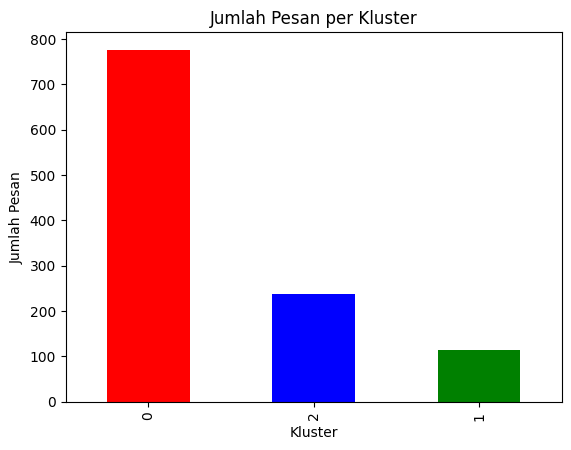

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data dari CSV
df = pd.read_csv("data_cleaned2.csv")

# Menggunakan kolom 'Message' untuk clustering
messages = df['Message'].fillna("")

# Konversi pesan menjadi vektor TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(messages)

# Buat model K-Means dengan 3 kluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Simpan hasil clustering ke file baru
df.to_csv("data_clustered2.csv", index=False)
print("Hasil clustering telah disimpan ke chat_clustered.csv")

# Visualisasi jumlah pesan per kluster
df['Cluster'].value_counts().plot(kind="bar", color=['red', 'blue', 'green'])
plt.title("Jumlah Pesan per Kluster")
plt.xlabel("Kluster")
plt.ylabel("Jumlah Pesan")
plt.show()

In [5]:
from collections import Counter

# Mendapatkan 3 kata teratas untuk setiap kluster
for cluster_id in range(3):  # Ganti dengan jumlah kluster
    # Mengambil pesan-pesan dari kluster tertentu
    cluster_messages = df[df['Cluster'] == cluster_id]['Message']
    
    # Mengonversi pesan menjadi string dan mengganti NaN dengan string kosong
    cluster_messages = cluster_messages.fillna("").astype(str)
    
    # Menggabungkan semua pesan dalam kluster menjadi satu string dan memisahkannya menjadi kata-kata
    all_words = " ".join(cluster_messages).split()
    
    # Mendapatkan 3 kata teratas menggunakan Counter
    most_common_words = Counter(all_words).most_common(3)
    
    # Menampilkan hasil
    print(f"Kluster {cluster_id}: {most_common_words}")

Kluster 0: [('~', 84), ('bisa', 77), ('di', 65)]
Kluster 1: [('sudah', 73), ('yang', 67), ('List', 65)]
Kluster 2: [('<Media', 238), ('omitted>', 238)]


In [6]:
analysis_data = {
    "Kluster": [0, 1, 2],
    "Analisis": [
        "Berisi pesan yang banyak mengandung kata-kata terkait 'bisa','di' dan simbol ~.",
        "Berisi pesan pernyataan 'sudah', 'yang', dan 'list'",
        "Banyak pesan umum yang mengandung kata '<Media>', '<Omitted>'."
    ]
}

analysis_df = pd.DataFrame(analysis_data)
analysis_df.to_csv("hasil_analisis2.csv", index=False)